In [1]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [33]:
# Carregando a base de dados

path = kagglehub.dataset_download("ashaychoudhary/the-power-of-social-media-engagement")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/ashaychoudhary/the-power-of-social-media-engagement/versions/1


['social_media_engagement.csv']

In [34]:
path = '/root/.cache/kagglehub/datasets/ashaychoudhary/the-power-of-social-media-engagement/versions/1'
df = pd.read_csv(path + '/social_media_engagement.csv')

## Propriedades dos dados:

In [5]:
# Verificando as linhas iniciais do dataset
df.head()

,post_id,platform,post_type,post_time,caption,hashtags,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,sentiment_score
0,1,Facebook,image,2023-08-17 14:45,Best day ever! 🎉,#Social,2121,474,628,16,1,14,Thursday,positive
1,2,Facebook,carousel,2023-05-14 00:45,Here's a quick update.,"#Family, #Community, #Events",3660,432,694,22,3,0,Sunday,neutral
2,3,Instagram,poll,2023-02-21 16:15,Not my best day. 😞,"#Beauty, #Fashion, #InstaDaily",4955,408,688,18,3,16,Tuesday,negative
3,4,Twitter,image,2023-11-16 00:45,Disappointed but moving on.,"#Trending, #Tech, #Entertainment",1183,90,187,27,3,0,Thursday,negative
4,5,Twitter,video,2023-05-23 00:30,Exciting news! 🚀,"#News, #Politics, #Entertainment",3499,247,286,16,3,0,Tuesday,positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          1000 non-null   int64 
 1   platform         1000 non-null   object
 2   post_type        1000 non-null   object
 3   post_time        1000 non-null   object
 4   caption          1000 non-null   object
 5   hashtags         1000 non-null   object
 6   likes            1000 non-null   int64 
 7   comments         1000 non-null   int64 
 8   shares           1000 non-null   int64 
 9   caption_length   1000 non-null   int64 
 10  num_hashtags     1000 non-null   int64 
 11  post_hour        1000 non-null   int64 
 12  post_day         1000 non-null   object
 13  sentiment_score  1000 non-null   object
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


# Analises sobre as frequências:

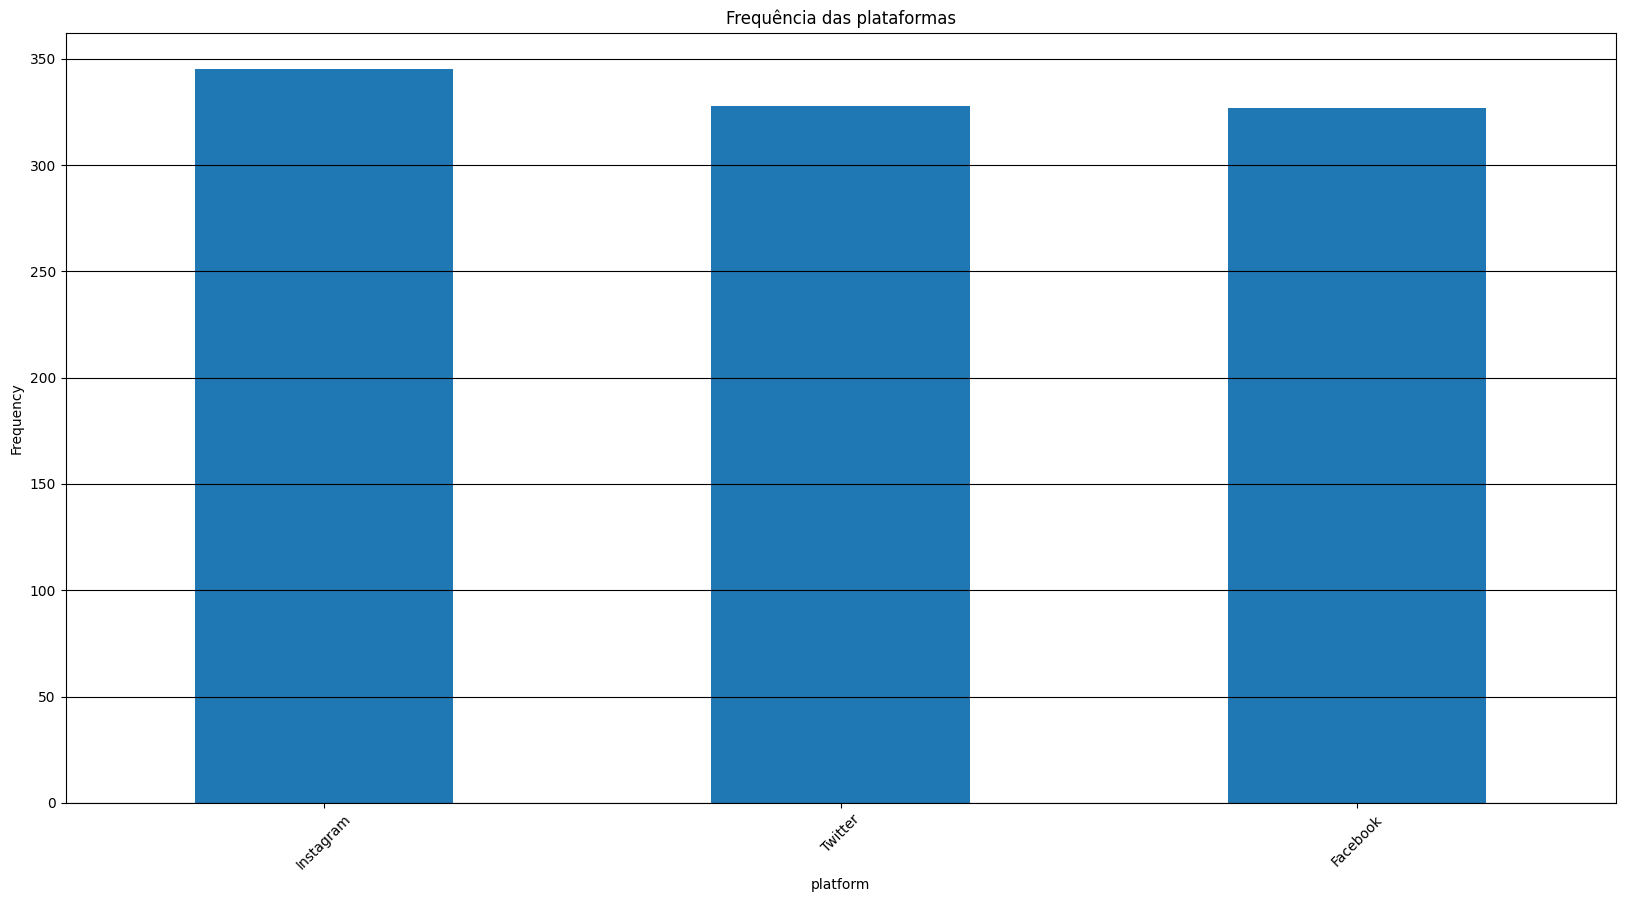

In [7]:
# Gráfico com as idades mais recorrentes dos acidentes
plt.figure(figsize=(20, 10))
plt.title("Frequência das plataformas")
plt.xlabel("platform")
plt.ylabel("Frequency")
df['platform'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=45)
plt.show()

In [8]:
qtd_plataforma = df['platform'].value_counts().reset_index(name='Frequency')
qtd_plataforma.columns = ['platform', 'Frequency']
qtd_plataforma

,platform,Frequency
0,Instagram,345
1,Twitter,328
2,Facebook,327


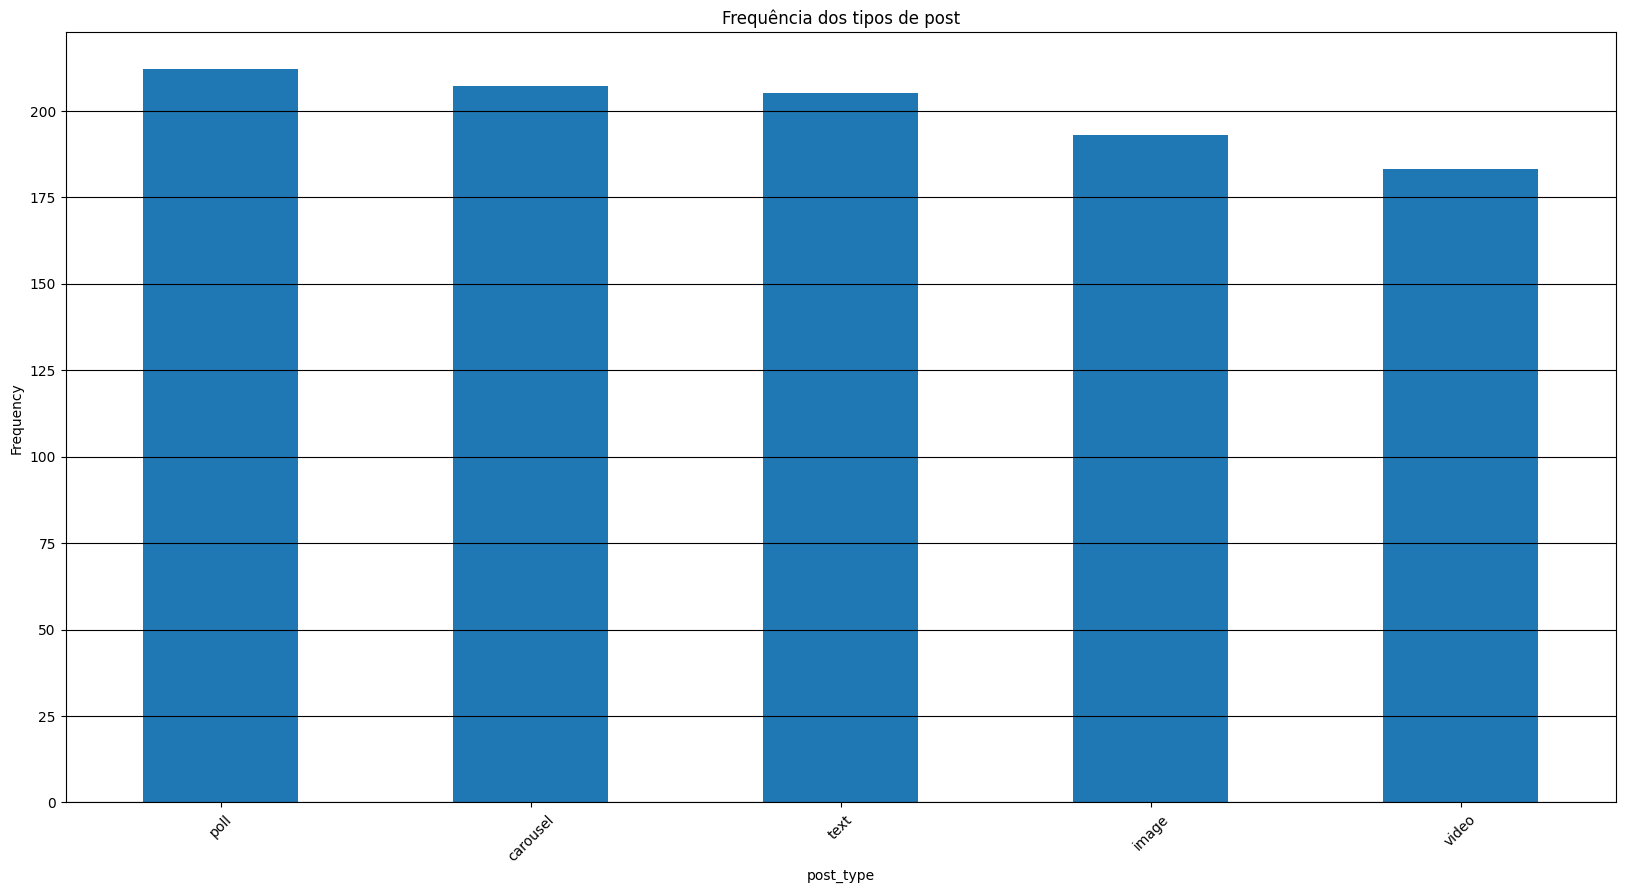

In [12]:
# Gráfico com os tipos de post

plt.figure(figsize=(20, 10))
plt.title("Frequência dos tipos de post")
plt.xlabel("post_type")
plt.ylabel("Frequency")
df['post_type'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=45)
plt.show()

In [13]:
qtd_age = df['post_type'].value_counts().reset_index(name='Frequency')
qtd_age.columns = ['post_type', 'Frequency']
qtd_age

,post_type,Frequency
0,poll,212
1,carousel,207
2,text,205
3,image,193
4,video,183


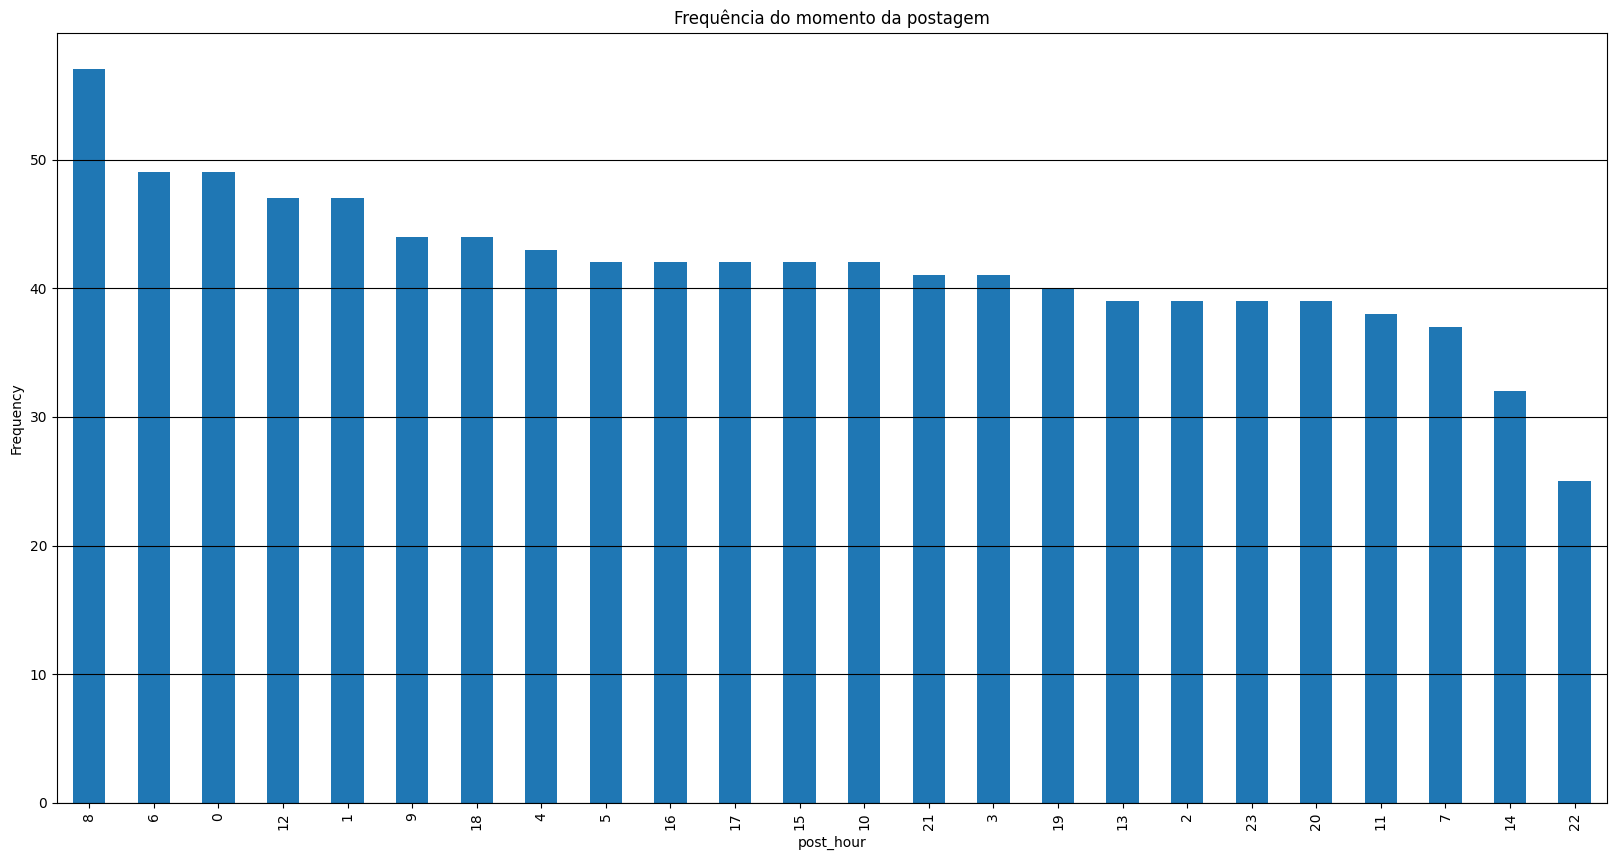

In [15]:
# Gráfico com o momento da postagem

plt.figure(figsize=(20, 10))
plt.title("Frequência do momento da postagem")
plt.xlabel("post_hour")
plt.ylabel("Frequency")
df['post_hour'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=90)
plt.show()

In [16]:
qtd_hora = df['post_hour'].value_counts().reset_index(name='Frequency')
qtd_hora.columns = ['post_hour', 'Frequency']
qtd_hora

,post_hour,Frequency
0,8,57
1,6,49
2,0,49
3,12,47
4,1,47
5,9,44
6,18,44
7,4,43
8,5,42
9,16,42


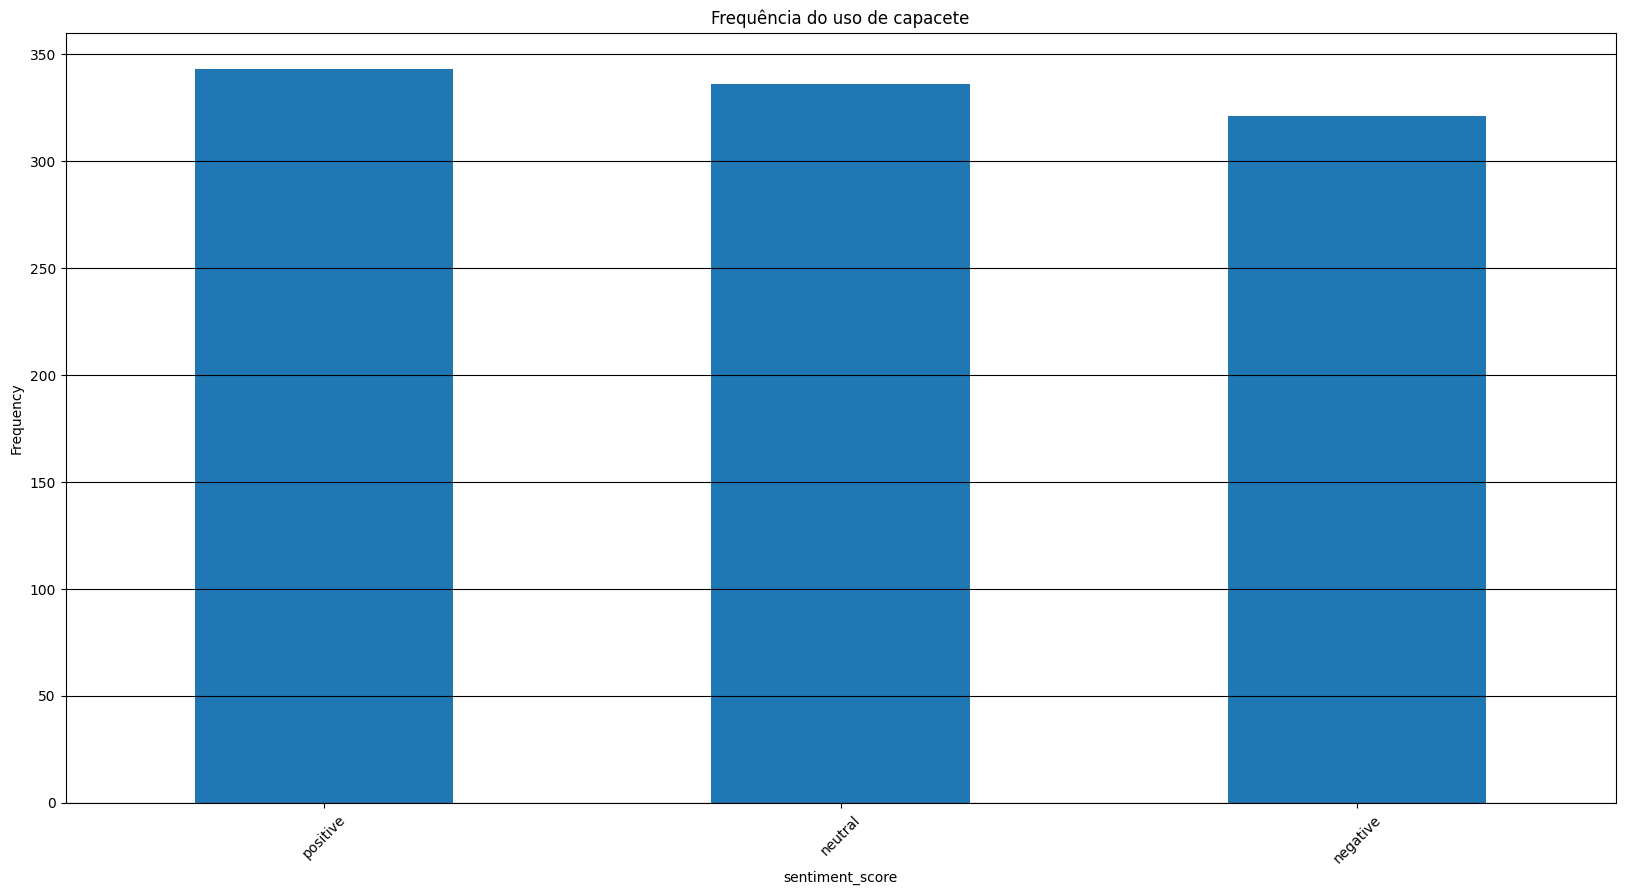

In [18]:
# Gráfico sobre o uso das hastags
plt.figure(figsize=(20, 10))
plt.title("Frequência do uso de capacete")
plt.xlabel("sentiment_score")
plt.ylabel("Frequency")
df['sentiment_score'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=45)
plt.show()

In [19]:
qtd_sentimento = df['sentiment_score'].value_counts().reset_index(name='Frequency')
qtd_sentimento.columns = ['sentiment_score', 'Frequency']
qtd_sentimento

,sentiment_score,Frequency
0,positive,343
1,neutral,336
2,negative,321


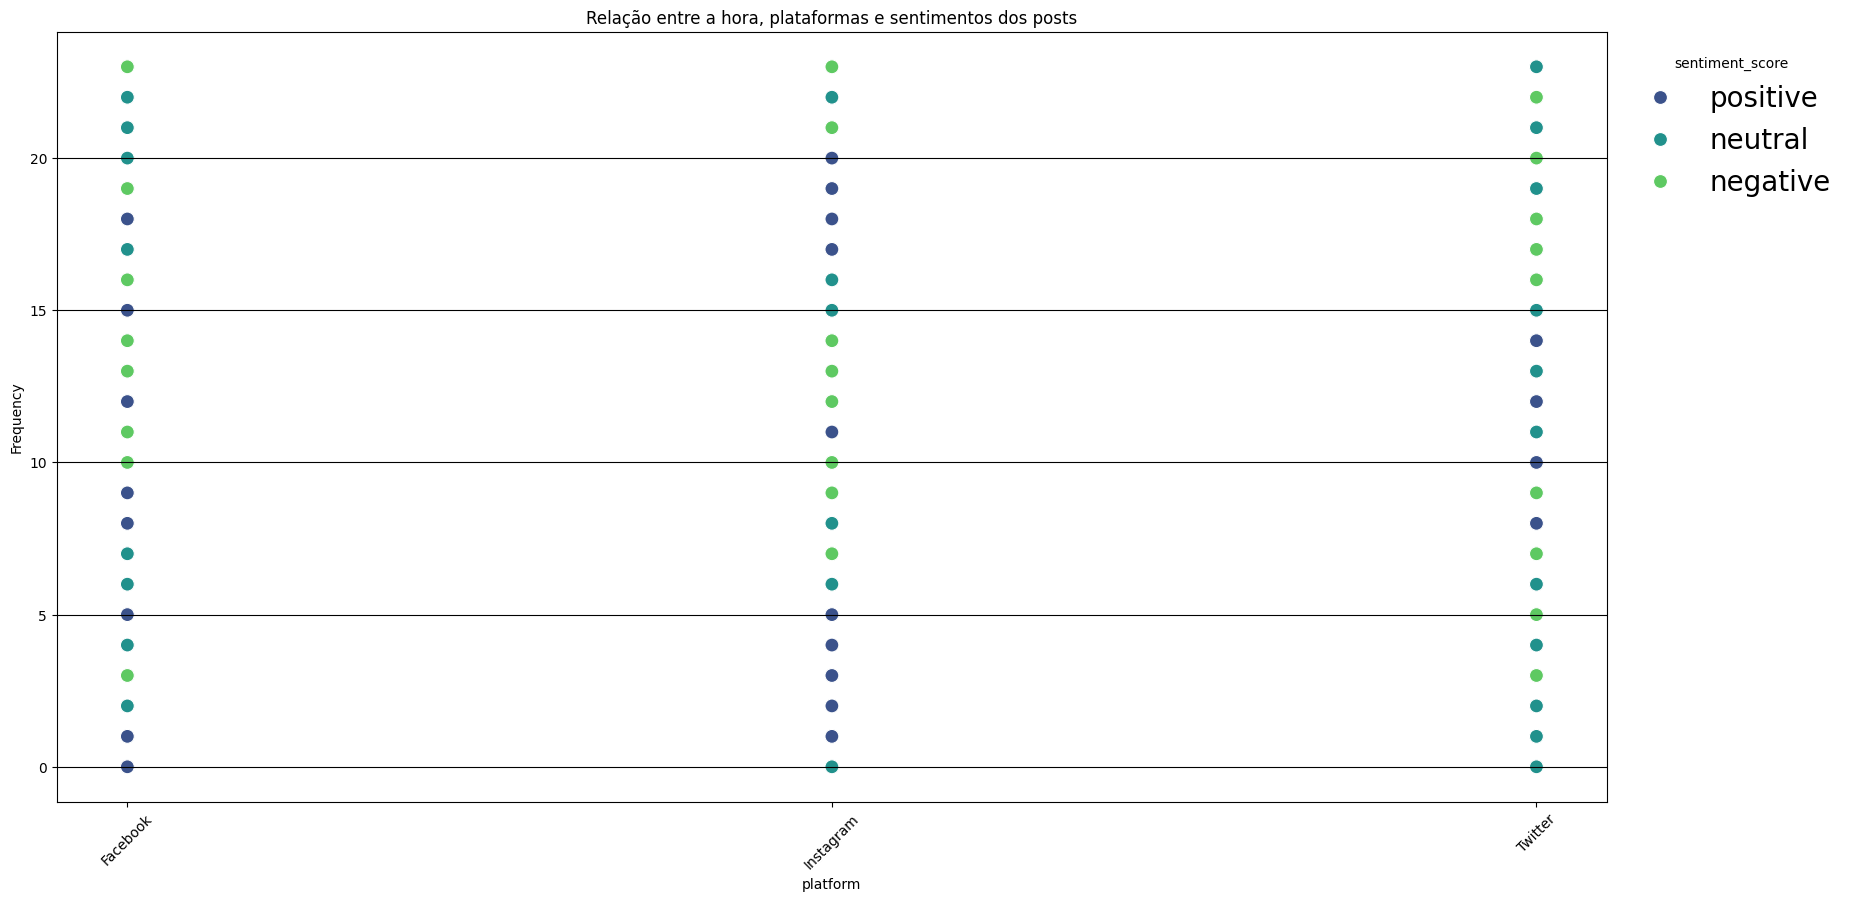

In [25]:
# Compartilhamento de hora e sentimentos nas postagens entre as plataformas

plt.figure(figsize=(20, 10))
plt.title("Relação entre a hora, plataformas e sentimentos dos posts")
plt.xlabel("platform")
plt.ylabel("Frequency")
sns.scatterplot(data=df, x='platform', y='post_hour', hue='sentiment_score', palette='viridis', s = 100)
plt.legend(title='sentiment_score', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=20)
plt.grid(axis='y', color='black')
plt.xticks(rotation=45)
plt.show()

# ML

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [68]:
# Codificação de variáveis categóricas com One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['platform', 'post_type', 'post_hour'], drop_first=True)

df_encoded['post_time'] = pd.to_datetime(df_encoded['post_time'])
df_encoded['post_hour_num'] = df_encoded['post_time'].dt.hour
df_encoded['post_day'] = df_encoded['post_time'].dt.day
df_encoded['post_month'] = df_encoded['post_time'].dt.month

# Removendo a coluna 'caption' e 'hastags'
df_encoded = df_encoded.drop(['hashtags', 'caption'], axis=1)

# Codificando a variável alvo 'sentiment_score' (caso seja categórica)
label_encoder = LabelEncoder()
df_encoded['sentiment_score'] = label_encoder.fit_transform(df_encoded['sentiment_score'])

# Variáveis independentes (X) e dependentes (y)
X = df_encoded.drop(['sentiment_score', 'post_id', 'post_time'], axis=1)  # 'caption' já foi removido
X.columns = X.columns.astype(str)  # Convert column names to strings
y = df_encoded['sentiment_score']  # Variável alvo

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [69]:
# Treinando o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')


print(classification_report(y_test, y_pred))

Acurácia: 63.00%
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        53
           1       0.57      0.67      0.61        69
           2       0.72      0.56      0.63        78

    accuracy                           0.63       200
   macro avg       0.64      0.64      0.63       200
weighted avg       0.64      0.63      0.63       200

